# Stock Price Prediction Using RNNs

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [2]:
!pip install numpy pandas matplotlib seaborn scikit-learn

  Using cached numpy-1.24.4-cp38-cp38-macosx_10_9_x86_64.whl.metadata (5.6 kB)
  Using cached pandas-2.0.3-cp38-cp38-macosx_10_9_x86_64.whl.metadata (18 kB)
  Using cached matplotlib-3.7.5-cp38-cp38-macosx_10_12_x86_64.whl.metadata (5.7 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.3.2-cp38-cp38-macosx_10_9_x86_64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.1.1-cp38-cp38-macosx_10_9_x86_64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp38-cp38-macosx_10_9_x86_64.whl.metadata (102 kB)
  Using cached kiwisolver-1.4.7-cp38-cp38-macosx_10_9_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-10.4.0-cp38-cp38-macosx_10_10_x86_64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
  Using cached imp

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

# Set themes, styles and color palette for seaborn charts
sns.set_theme(style='darkgrid', context='poster')
sns.set_palette(palette='pastel', n_colors=10)

plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["axes.titlesize"] = 14 
plt.rcParams["axes.labelsize"] = 12 
plt.rcParams["xtick.labelsize"] = 10 
plt.rcParams["ytick.labelsize"] = 10 

### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

#### **1.1.1** <font color =red> [5 marks] </font>
Create the function to join DataFrames and use it to combine the four datasets.

In [4]:
# Define a function to load data and aggregate them

def load_and_aggregate_data (root_folder, file_list):
    df = pd.DataFrame()

    for file in file_list:
        df_temp = pd.read_csv(os.path.join(root_folder, file))

        df = pd.concat([df, df_temp], ignore_index=True)

        print(f'Shape of data in {file} is {df_temp.shape}')

    print(f'Shape of aggregated data is {df.shape}')

    return df

In [5]:
# Specify the names of the raw data files to be read and use the aggregation function to read the files
root_folder = 'RNN_Stocks_Data'

file_list = os.listdir(root_folder)

df = load_and_aggregate_data(root_folder, file_list)

Shape of data in AMZN_stocks_data.csv is (3019, 7)
Shape of data in IBM_stocks_data.csv is (3020, 7)
Shape of data in MSFT_stocks_data.csv is (3019, 7)
Shape of data in GOOGL_stocks_data.csv is (3019, 7)
Shape of aggregated data is (12077, 7)


In [6]:
# View specifics of the data
df.info()

# Quick observation
#-------------------
# 1. The date and name columns are loaded as object type. Hence change the data type.
#-------------------

df['Date'] = pd.to_datetime(df['Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12077 entries, 0 to 12076
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    12077 non-null  object 
 1   Open    12076 non-null  float64
 2   High    12077 non-null  float64
 3   Low     12076 non-null  float64
 4   Close   12077 non-null  float64
 5   Volume  12077 non-null  int64  
 6   Name    12077 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 660.6+ KB


In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

In [8]:
# Handle Missing Values
# Re-used code from my LendingClubCaseStudy (https://github.com/uvarajthulasiram/LendingClubCaseStudy)
# Get the columns in the decending order of most number of null values 
print(df.isnull().sum().sort_values(ascending=False))

# Get those column which has null values accross the series
print(df.columns[df.isnull().all()])

# Let us find out how many columns has null values in all the rows.
print(f"Number of columns with null values in all the rows: {df.columns[df.isnull().all()].size}")

df[df['Open'].isnull() | df['Close'].isnull()]

# Quick observation
#-------------------
# 1. There are only two null values spread across in columns 'open' and 'close'
# 2. There are no columns with null values across all rows.
# 3. Ticker 'IBM' has null value in columns 'open' and 'close' on 31-July-2017. We can drop the row.
#-------------------

Open      1
Low       1
Date      0
High      0
Close     0
Volume    0
Name      0
dtype: int64
Index([], dtype='object')
Number of columns with null values in all the rows: 0


,Date,Open,High,Low,Close,Volume,Name
5932,2017-07-31,NaN,144.93,NaN,144.67,4355718,IBM


In [9]:
df = df[~(df['Open'].isnull() | df['Close'].isnull())]

df.shape

(12076, 7)

### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

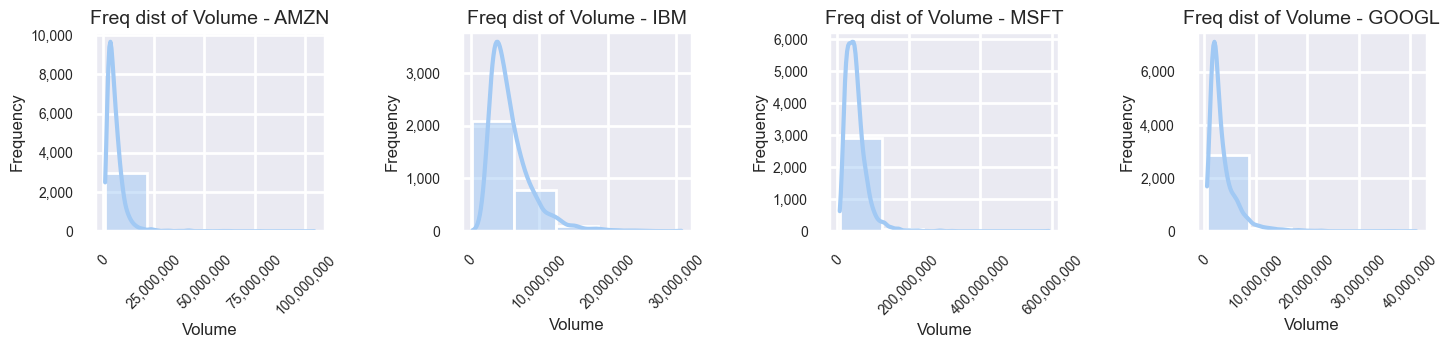

In [10]:
# Frequency distribution of volumes
import matplotlib.ticker as ticker

stocks = df['Name'].unique()
num_stocks = len(stocks)

num_cols = 4
num_rows = (num_stocks + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

axes = axes.flatten()

for i, stock in enumerate(stocks):
    sns.histplot(data=df[df['Name'] == stock]['Volume'], bins=5, kde=True, ax=axes[i])
    axes[i].set_title(f'Freq dist of Volume - {stock}')
    axes[i].set_xlabel('Volume') 
    axes[i].set_ylabel("Frequency")
    axes[i].tick_params(axis='x', rotation=45)

    axes[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    axes[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Quick observation
#-------------------
# 1. Looks like there are a lot of outliers! @Praveen, we'll discuss this.
#-------------------

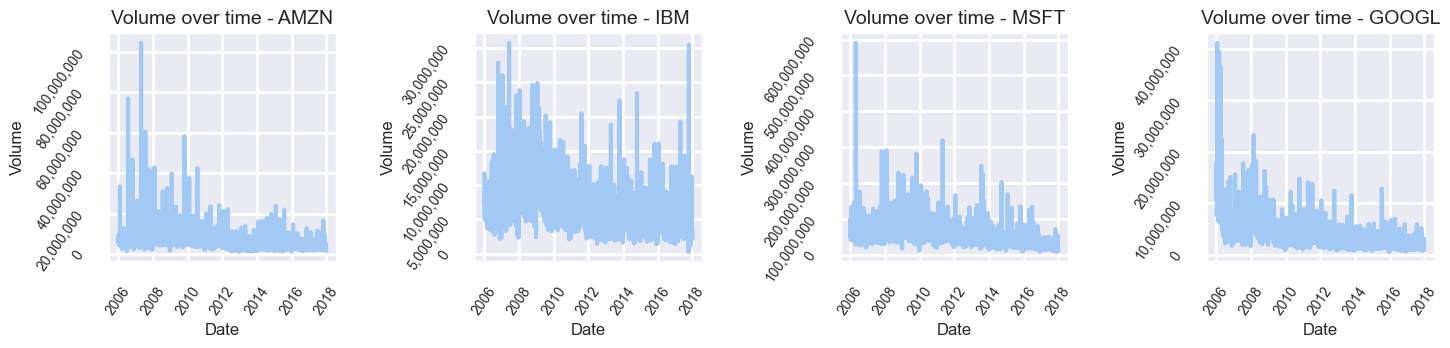

In [11]:
# Stock volume variation over time
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

axes = axes.flatten()

for i, stock in enumerate(stocks):
    sns.lineplot(data=df[df['Name'] == stock], x='Date', y='Volume', ax=axes[i])
    axes[i].set_title(f'Volume over time - {stock}')
    axes[i].set_xlabel('Date') 
    axes[i].set_ylabel("Volume")
    axes[i].tick_params(axis='x', rotation=55)
    axes[i].tick_params(axis='y', rotation=55)

    axes[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Quick observation
#-------------------
# 1. Volume has decreased over time for all the stocks
#-------------------

#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

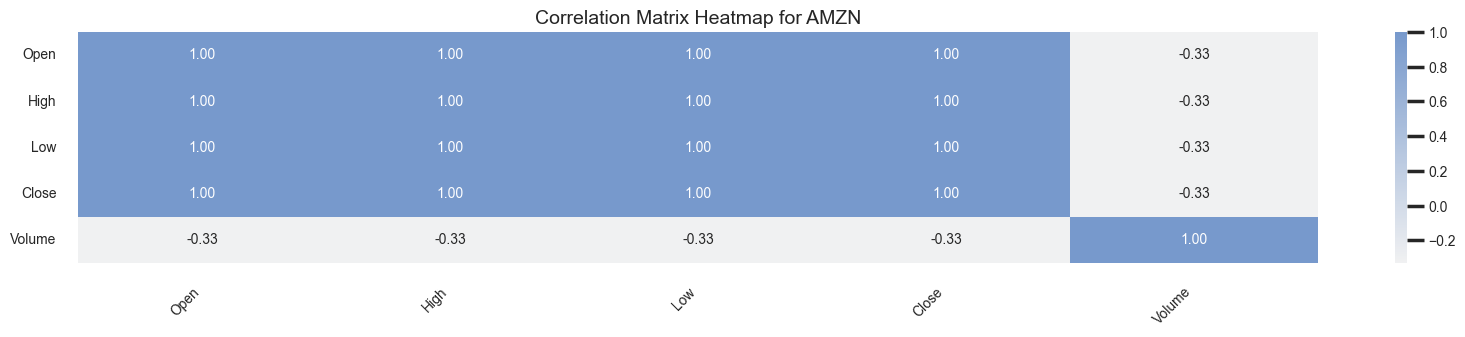

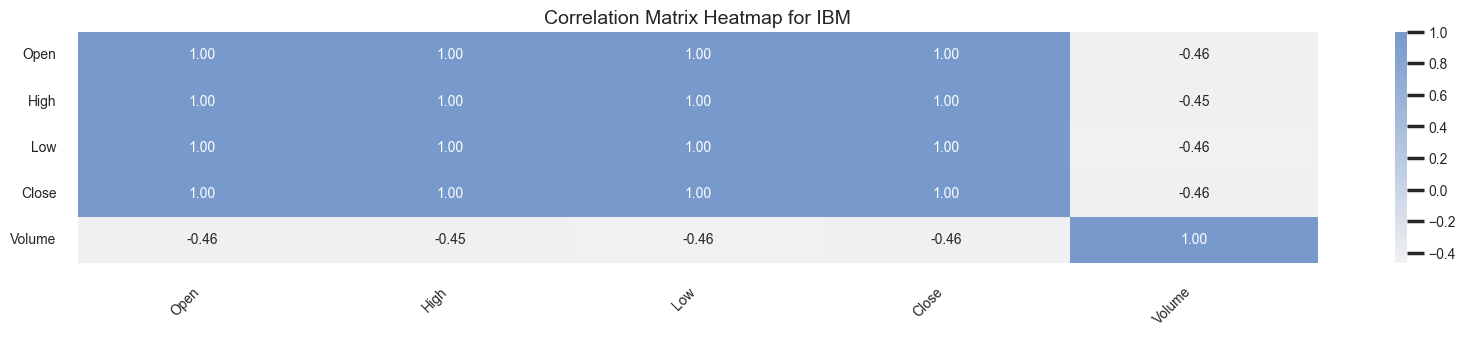

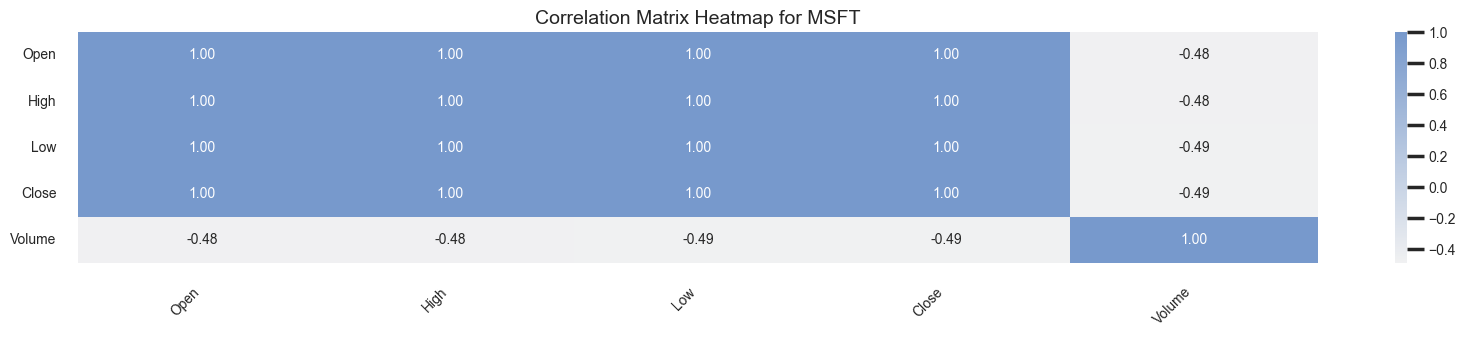

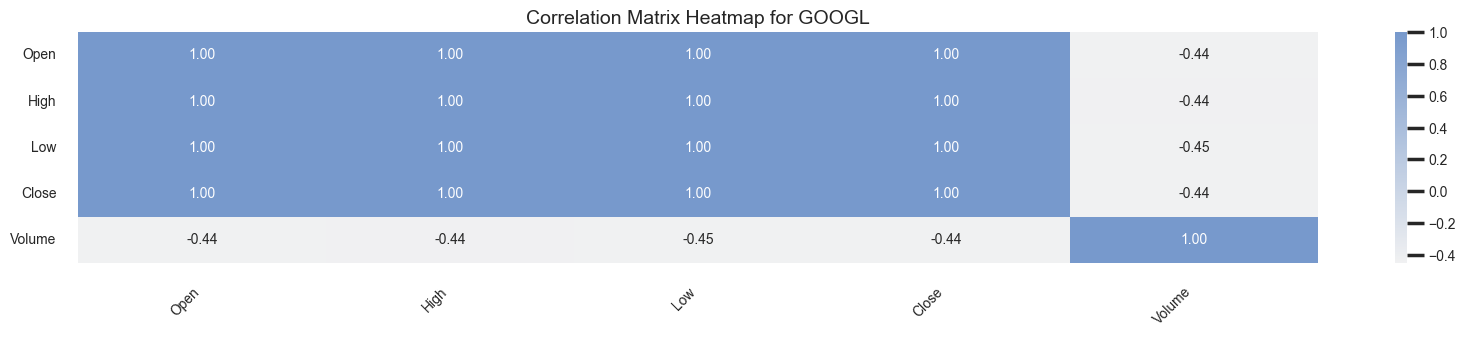

In [12]:
# Analyse correlations
for i, stock in enumerate(stocks):
    numeric_features = df[df['Name'] == stock].select_dtypes('number')
    plt.figure(figsize=(20, 3))
    sns.heatmap(data=numeric_features.corr(), annot=True, annot_kws={'fontsize': 10}, cmap=sns.light_palette("#79c", as_cmap=True), fmt='.2f')

    plt.xticks(fontsize=10, rotation=45, ha='right')
    plt.yticks(fontsize=10, rotation=0)
    plt.title(f"Correlation Matrix Heatmap for {stock}")
    plt.show()


# Quick observation
#-------------------
# 1. As prices go up volume goes down
#       AMZN - Volume goes down by 33% when the price goes up and vice versa
#       GOOGL - 44%
#       IBM - 45%
#       MSFT - 48%
#-------------------


### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

**Hint:** If we use a window of size 3, in the first window, the rows `[0, 1, 2]` will be present and will be used to predict the value of `CloseAMZN` in row `3`. In the second window, rows `[1, 2, 3]` will be used to predict `CloseAMZN` in row `4`.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

In [13]:
# Define a function that divides the data into windows and generates target variable values for each window
def get_windowed_data(input_df, target_stocks, window_size, step_size):
    input_df = input_df[input_df['Name'].isin(target_stocks)]

    unique_stocks = input_df['Name'].unique()
    sorted_df = input_df.sort_values(['Name', 'Date']).reset_index(drop=True)
    
    X_windows = []
    y_values = []

    for stock in unique_stocks:
        sorted_df_filtered_by_name = sorted_df[sorted_df['Name'] == stock]

        for start_idx in range(0, len(sorted_df_filtered_by_name) - window_size, step_size):
            end_idx = start_idx + window_size

            if end_idx >= len(sorted_df_filtered_by_name):
                break

            X_windows.append(sorted_df_filtered_by_name.iloc[start_idx:end_idx])
            y_values.append(sorted_df_filtered_by_name.iloc[end_idx]['Close'])

    return X_windows, y_values

In [14]:
window_size = 3
step_size = 1
target_stocks = ['AMZN', 'GOOGL']

X_windows, y_values = get_windowed_data(df, target_stocks, window_size, step_size)

print(X_windows[0], y_values[0])
print(X_windows[1], y_values[1])
print(X_windows[2], y_values[2])

print(X_windows[-3], y_values[-3])
print(X_windows[-2], y_values[-2])
print(X_windows[-1], y_values[-1])

# Quick observation
#-------------------
# X_window[0] is the first three observations from the data
# y_values[0] is the 4th observations value in 'Close' column.
# Similarly we'll have 12076 - 3 = 12073 windows of data 
#-------------------

        Date   Open   High    Low  Close   Volume  Name
0 2006-01-03  47.47  47.85  46.25  47.58  7582127  AMZN
1 2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN
2 2006-01-05  47.16  48.20  47.11  47.65  5417258  AMZN 47.87
        Date   Open   High    Low  Close   Volume  Name
1 2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN
2 2006-01-05  47.16  48.20  47.11  47.65  5417258  AMZN
3 2006-01-06  47.97  48.58  47.32  47.87  6154285  AMZN 47.08
        Date   Open   High    Low  Close   Volume  Name
2 2006-01-05  47.16  48.20  47.11  47.65  5417258  AMZN
3 2006-01-06  47.97  48.58  47.32  47.87  6154285  AMZN
4 2006-01-09  46.55  47.10  46.40  47.08  8945056  AMZN 45.65
           Date     Open     High      Low    Close   Volume   Name
6032 2017-12-21  1075.39  1077.52  1069.00  1070.85  1282025  GOOGL
6033 2017-12-22  1070.00  1071.72  1067.64  1068.86   889446  GOOGL
6034 2017-12-26  1068.64  1068.86  1058.64  1065.85   918767  GOOGL 1060.2
           Date     Open     Hi

#### **1.3.2** <font color =red> [3 marks] </font>
Create a function to scale the data.

Define a function that will scale the data.

For scaling, we have to look at the whole length of data to find max/min values or standard deviations and means. If we scale the whole data at once, this will lead to data leakage in the windows. This is not necessarily a problem if the model is trained on the complete data with cross-validation.

One way to scale when dealing with windowed data is to use the `partial_fit()` method.
```
scaler.partial_fit(window)
scaler.transform(window)
```
You may use any other suitable way to scale the data properly. Arrive at a reasonable way to scale your data.

In [15]:
# I'm using MinMaxScaler from sklearn for scaling 
# When no min and max values are passed in, the defaule min and max are 0 and 1.
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# Define a function that scales the windowed data
def get_scale_windowed_data(param_windows, param_values):
    X_scaled = []
    y_scaled= []

    # Train the scaler to learn the windowed data
    for window in param_windows:
        X_scaler.partial_fit(window.select_dtypes(include='number'))

    for value in param_values:
        y_scaler.partial_fit(np.array([[value]]))
        
    for window in param_windows:
        X_scaled.append(X_scaler.transform(window.select_dtypes(include='number')))

    # y_scaler needs 2D array. Hence converting param_values to 2D array
    y_2d_values = np.array(param_values).reshape(-1, 1)
    y_scaled = y_scaler.transform(y_2d_values)

    return X_scaled, y_scaled


In [16]:
# The function takes in the windowed data sets and returns the scaled windows
X_scaled, y_scaled = get_scale_windowed_data(X_windows, y_values)

print(X_windows[0], y_values[0])
print(X_scaled[0], y_scaled[0])

# Quick observation
#-------------------
# The numeric values in the windows and values are scaled now and are between 0 and 1
#-------------------

        Date   Open   High    Low  Close   Volume  Name
0 2006-01-03  47.47  47.85  46.25  47.58  7582127  AMZN
1 2006-01-04  47.48  47.73  46.69  47.25  7440914  AMZN
2 2006-01-05  47.16  48.20  47.11  47.65  5417258  AMZN 47.87
[[0.01813724 0.01815333 0.0175821  0.01838839 0.06797027]
 [0.01814573 0.01805224 0.01795965 0.01810628 0.06661093]
 [0.01787426 0.01844816 0.01832005 0.01844823 0.04713087]] [0.0186363]


Next, define the main function that will call the windowing and scaling helper functions.

The input parameters for this function are:
- The joined master data set
- The names of the stocks that we wish to predict the *Close* prices for
- The window size
- The window stride
- The train-test split ratio

The outputs from this function are the scaled dataframes:
- *X_train*
- *y_train*
- *X_test*
- *y_test*

In [17]:
def get_windowed_scaled_df(param_df, param_target_stocks, window_size, step_size, test_ratio):
    X_windows, y_values = get_windowed_data(param_df, param_target_stocks, window_size, step_size)
    X_scaled, y_scaled = get_scale_windowed_data(X_windows, y_values)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=test_ratio, shuffle=False, stratify=None)

    return X_train, y_train, X_test, y_test

#### **1.3.3** <font color =red> [3 marks] </font>
Define a function to create windows of `window_size` and split the windowed data in to training and validation sets.

The function can take arguments such as list of target names, window size, window stride and split ratio. Use the windowing function here to make windows in the data and then perform scaling and train-test split.

In [18]:
# Define a function to create input and output data points from the master DataFrame
window_size = 3
step_size = 1
test_ratio = 0.3
target_stocks = ['AMZN', 'GOOGL']

X_train, y_train, X_test, y_test = get_windowed_scaled_df(df, target_stocks, window_size, step_size, test_ratio)

print(len(X_train), len(X_test))
print(X_train[0].shape)
print(X_train[0])
print(y_train[0])

# Quick observation
#-------------------
# The main function has returned windowed data
# Also the windowed data and the target value are scaled (between 0 and 1)
#-------------------

4222 1810
(3, 5)
[[0.01813724 0.01815333 0.0175821  0.01838839 0.06797027]
 [0.01814573 0.01805224 0.01795965 0.01810628 0.06661093]
 [0.01787426 0.01844816 0.01832005 0.01844823 0.04713087]]
[0.0186363]


We can now use these helper functions to create our training and testing data sets. But first we need to decide on a length of windows. As we are doing time series prediction, we want to pick a sequence that shows some repetition of patterns.

For selecting a good sequence length, some business understanding will help us. In financial scenarios, we can either work with business days, weeks (which comprise of 5 working days), months, or quarters (comprising of 13 business weeks). Try looking for some patterns for these periods.

#### **1.3.4** <font color =red> [2 marks] </font>
Identify an appropriate window size.

For this, you can use plots to see how target variable is varying with time. Try dividing it into parts by weeks/months/quarters.

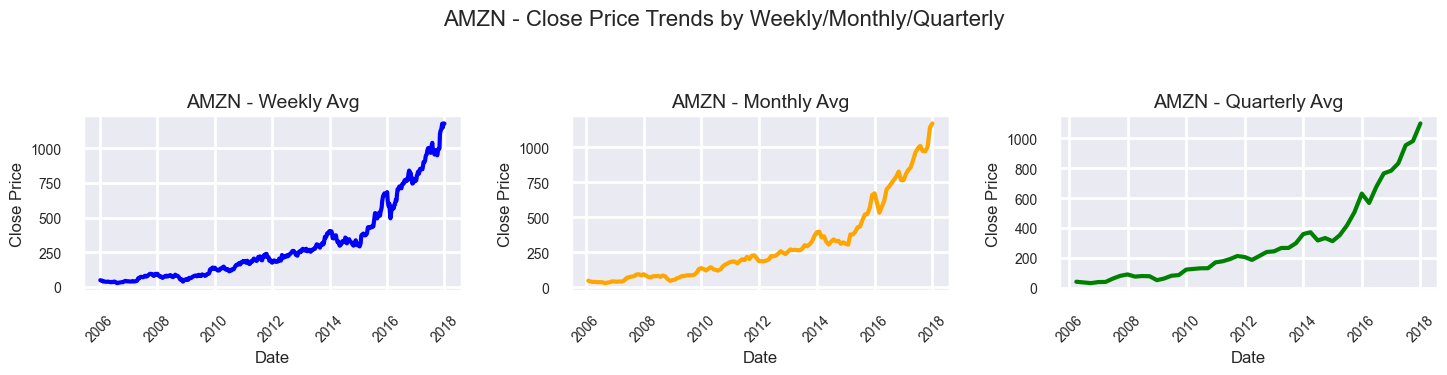

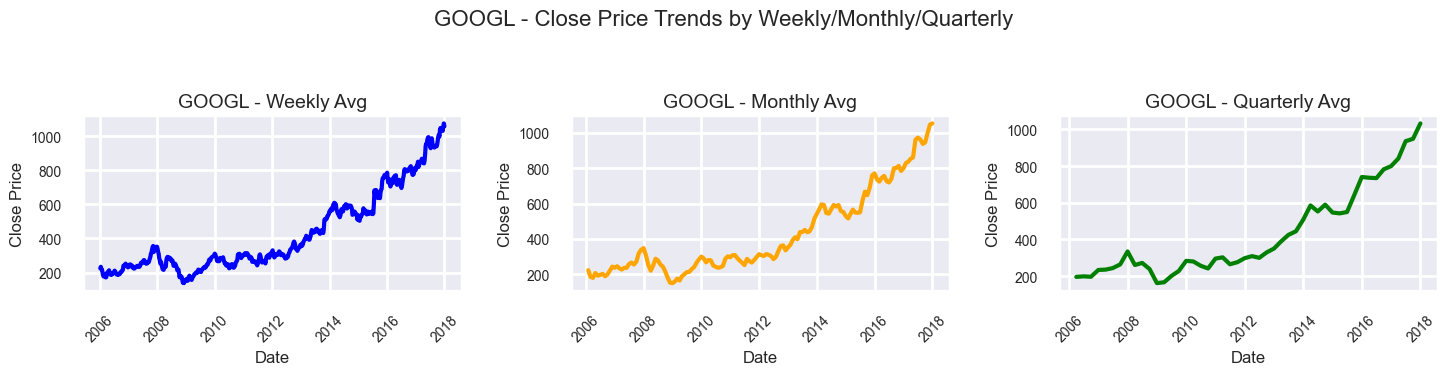

In [19]:
# Checking for patterns in different sequence lengths
def plot_time_patterns(df, target_stocks):
    for stock in target_stocks:
        # Setting 'Date' column as index as we can use resampling and filter by time series
        stock_df = df[df['Name'] == stock].set_index('Date').sort_index()
        weekly = stock_df['Close'].resample('W').mean().reset_index()
        monthly = stock_df['Close'].resample('M').mean().reset_index()
        quarterly = stock_df['Close'].resample('Q').mean().reset_index()

        # print(weekly.head())
        # print(monthly.head())
        # print(quarterly.head())

        fig, axes = plt.subplots(1, 3, figsize=(15, 4))

        sns.lineplot(data=weekly, x='Date', y='Close', ax=axes[0], color='blue')
        axes[0].set_title(f'{stock} - Weekly Avg')

        sns.lineplot(data=monthly, x='Date', y='Close', ax=axes[1], color='orange')
        axes[1].set_title(f'{stock} - Monthly Avg')

        sns.lineplot(data=quarterly, x='Date', y='Close', ax=axes[2], color='green')
        axes[2].set_title(f'{stock} - Quarterly Avg')

        for ax in axes:
            ax.set_xlabel('Date')
            ax.set_ylabel('Close Price')
            ax.tick_params(axis='x', rotation=45)
            ax.grid(True)

        plt.suptitle(f'{stock} - Close Price Trends by Weekly/Monthly/Quarterly', fontsize=16)
        plt.tight_layout()
        plt.show()

plot_time_patterns(df, ['AMZN', 'GOOGL'])

# Quick observation
#-------------------
# Couldn't find any pattern from these graphs!
#-------------------

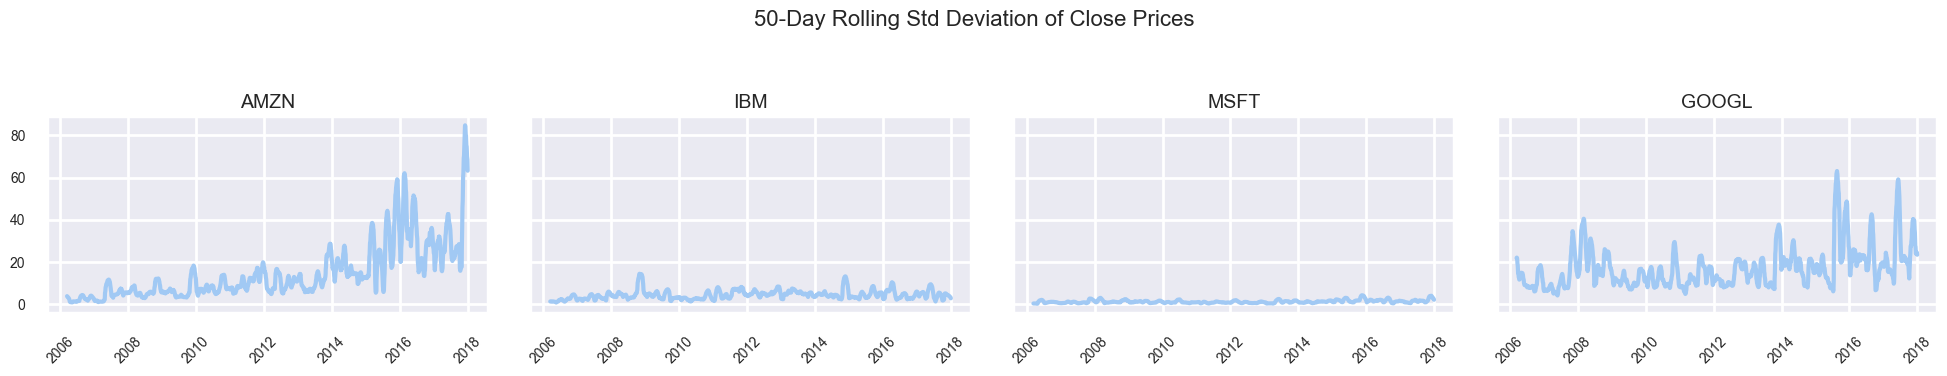

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4), sharey=True)

for i, stock in enumerate(stocks):
    stock_data = df[df['Name'] == stock]
    rolling_std = stock_data['Close'].rolling(window=50).std()
    
    axes[i].plot(stock_data['Date'], rolling_std)
    axes[i].set_title(stock)
    axes[i].tick_params(axis='x', rotation=45)

fig.suptitle('50-Day Rolling Std Deviation of Close Prices', fontsize=16)
plt.tight_layout()
plt.show()

# Quick observation
#-------------------
# While Amazon grew exponentially, Microsoft grew gradually
# Google and IBM have heavy fluctuations with respect to volatality
#-------------------

#### **1.3.5** <font color =red> [2 marks] </font>
Call the functions to create testing and training instances of predictor and target features.

In [21]:
# Create data instances from the master data frame using decided window size and window stride
window_size = 3
step_size = 1
test_ratio = 0.3
target_stocks = ['AMZN', 'GOOGL']

X_train, y_train, X_test, y_test = get_windowed_scaled_df(df, target_stocks, window_size, step_size, test_ratio)


In [22]:
# Check the number of data points generated
print(len(X_train), len(X_test))
print(X_train[0].shape)

4222 1810
(3, 5)


**Check if the training and testing datasets are in the proper format to feed into neural networks.**

In [23]:
# Check if the datasets are compatible inputs to neural networks
# Convert the train and test lists to array
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

print("X_train shape:", X_train_np.shape)
print("y_train shape:", y_train_np.shape)
print("X_test shape:", X_test_np.shape)
print("y_test shape:", y_test_np.shape)

print(X_train_np[1])
print(y_train_np[0])

# Quick observation
#-------------------
# Iteration 1: window_size = 50 ; step_size = 25
# We have 166 training sets with 50 items in each window
# Each item has open, high, low, close and volume features and are scaled to have values between 0 and 1.
#-------------------
# Iteration 2: window_size = 3 ; step_size = 1
# We have 4222 training sets with 3 items in each window
#-------------------

X_train shape: (4222, 3, 5)
y_train shape: (4222, 1)
X_test shape: (1810, 3, 5)
y_test shape: (1810, 1)
[[0.01814573 0.01805224 0.01795965 0.01810628 0.06661093]
 [0.01787426 0.01844816 0.01832005 0.01844823 0.04713087]
 [0.01856141 0.01876827 0.01850024 0.0186363  0.05422562]]
[0.0186363]


## **2 RNN Models** <font color =red> [20 marks] </font>

In this section, we will:
- Define a function that creates a simple RNN
- Tune the RNN for different hyperparameter values
- View the performance of the optimal model on the test data

### **2.1 Simple RNN Model** <font color =red> [10 marks] </font>

#### **2.1.1** <font color =red> [3 marks] </font>
Create a function that builds a simple RNN model based on the layer configuration provided.

In [25]:
!pip install tensorflow

  Using cached tensorflow-2.13.1-cp38-cp38-macosx_10_15_x86_64.whl.metadata (3.2 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp38-cp38-macosx_10_9_x86_64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-macosx_10_9_x86_64.whl.metadata (5.2 kB)
  Using cached numpy-1.24.3-cp38-cp38-macosx_10_9_x86_64.whl.metadata (5.6 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached wrapt-1.17.2-cp38-cp38-macosx_10_9_x86_64.whl.metadata (6.4 kB)
  Using cached grpcio-1.70.0-cp38-cp38-macosx_10_14_universal2.whl.metadata (3.9 kB)
  Using cached tensor

In [26]:
# Create a function that creates a simple RNN model according to the model configuration arguments
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam

def build_rnn_model(input_shape, rnn_units, dropout_percentage, dense_units, learning_rate, model_type='SimpleRNN'):
    model = Sequential()

    if model_type == 'SimpleRNN':
        # Reference: https://keras.io/api/layers/recurrent_layers/simple_rnn/
        # Add a SimpleRNN layer, dropout layer, dense layer... relu activation, Adam optimizer learning rate and compile.
        model.add(SimpleRNN(units=rnn_units, input_shape=input_shape))
    elif model_type == 'LSTM':
        model.add(LSTM(units=rnn_units, input_shape=input_shape, return_sequences=False))
    elif model_type == 'GRU':
        model.add(GRU(units=rnn_units, input_shape=input_shape, return_sequences=False))
        
    model.add(Dropout(dropout_percentage))
    model.add(Dense(units=dense_units, activation='relu'))

    # Add an output layer. We need one predection
    model.add(Dense(units=1))

    # Reference: https://keras.io/api/models/model_training_apis/#compile-method
    # Reference: https://keras.io/api/optimizers/adam/
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['accuracy'])

    return model


2025-06-04 21:20:34.043185: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
model = build_rnn_model(input_shape=X_train_np.shape[1:], rnn_units=64, dropout_percentage=0.25, dense_units=32, learning_rate=0.0001)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4480      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6593 (25.75 KB)
Trainable params: 6593 (25.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### **2.1.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [29]:
!pip install keras-tuner

In [30]:
# Find an optimal configuration of simple RNN
import keras_tuner as kt

# hyperparameters is an object instantiated from the class keras_tuner.engine.hyperparameters.HyperParameters
def model_builder(hyperparameters):
    rnn_units = hyperparameters.Int('rnn_units', min_value=32, max_value=128, step=32)
    dropout_rate = hyperparameters.Choice('dropout_rate', values=[0.1, 0.2, 0.3, 0.4])
    dense_units = hyperparameters.Int('dense_units', min_value=16, max_value=128, step=16)

    return build_rnn_model(input_shape=X_train_np.shape[1:], 
                                 rnn_units=rnn_units, 
                                 dropout_percentage=dropout_rate, 
                                 dense_units=dense_units, 
                                 learning_rate=0.0001)

In [31]:
import shutil

tuner = kt.RandomSearch(model_builder, objective='val_loss', max_trials=10)

tuner.search(X_train_np, y_train_np, validation_data=(X_test_np, y_test_np), epochs=10)

Trial 10 Complete [00h 00m 11s]
val_loss: 0.00021058309357613325

Best val_loss So Far: 0.00018671093857847154
Total elapsed time: 00h 02m 12s


In [255]:
# Find the best configuration based on evaluation metrics
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]

print(f"Best hyperparameters found: {best_hp.values}")

Best hyperparameters found: {'rnn_units': 64, 'dropout_rate': 0.1, 'dense_units': 48}


#### **2.1.3** <font color =red> [3 marks] </font>
Run for optimal Simple RNN Model and show final results.

In [256]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model
model = tuner.hypermodel.build(best_hp)

history = model.fit(X_train_np, y_train_np, validation_data=(X_test_np, y_test_np), epochs=10, verbose=1)

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 2.6803e-04 - loss: 0.0113 - val_accuracy: 0.0000e+00 - val_loss: 3.7127e-04
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 4.4017e-04 - loss: 0.0011 - val_accuracy: 0.0000e+00 - val_loss: 2.4382e-04
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.4538e-04 - loss: 8.7247e-04 - val_accuracy: 0.0000e+00 - val_loss: 2.7850e-04
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 4.3555e-04 - loss: 6.4707e-04 - val_accuracy: 0.0000e+00 - val_loss: 5.1598e-04
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 2.0314e-04 - loss: 6.1304e-04 - val_accuracy: 0.0000e+00 - val_loss: 1.3979e-04
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 2.9155e-04 - loss: 4.7691e-04 - val_accuracy: 0.0000e+00 - val_loss: 3.4582e-04
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 8.2320e-05 - loss: 4.1944e-04 - val_accuracy: 0.0000e+00 - val_loss: 1.6300e-04


Plotting the actual vs predicted values

In [32]:
# Predict on the test data and plot
y_pred_scaled = model.predict(X_test_np)

y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_test_np)

57/57 [==============================] - 1s 6ms/step


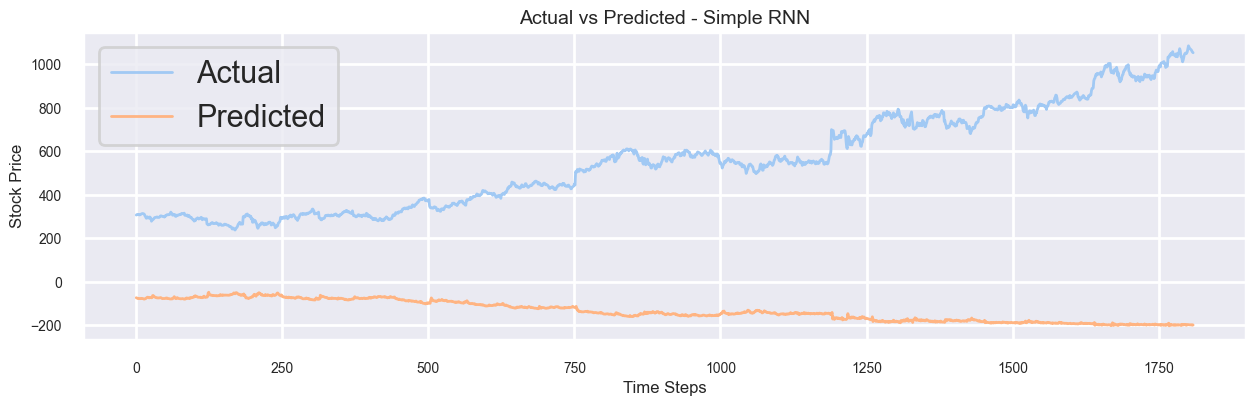

In [33]:
plt.figure(figsize=(15, 4))
plt.plot(y_true, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linewidth=2)
plt.title("Actual vs Predicted - Simple RNN")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

In [34]:
# Compute the performance of the model on the testing data set
test_loss, test_accuracy = model.evaluate(X_test_np, y_test_np, verbose='auto')

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# --------------------
# Quick Observations
# --------------------
# The accuracy is close to zero! but the predictions are close to actual (from the above graph)
# --------------------

57/57 [==============================] - 1s 4ms/step - loss: 0.4021 - accuracy: 0.0000e+00
Test Loss: 0.4021
Test Accuracy: 0.0000


### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

#### **2.2.1** <font color =red> [3 marks] </font>
Create a function that builds an advanced RNN model with tunable hyperparameters.

In [64]:
# # Define a function to create a model and specify default values for hyperparameters

# This is redundant!!! Have to rethink.

def model_builder(rnn_units=128, dropout_rate=0.3, dense_units=128, model_type='LSTM'):
    return build_rnn_model(input_shape=X_train_np.shape[1:], 
        rnn_units=rnn_units, 
        dropout_percentage=dropout_rate, 
        dense_units=dense_units, 
        learning_rate=0.0001,
        model_type=model_type)

#### **2.2.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [38]:
X_train = np.array(X_train)
y_train = np.array(y_train)

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32), 
                   return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(y_train.shape[1]))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mae']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='rnn_tuning',
    project_name='stock_rnn'
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Trial 5 Complete [00h 00m 25s]
val_loss: 3.605453093769029e-05

Best val_loss So Far: 3.117594314971939e-05
Total elapsed time: 00h 01m 41s


#### **2.2.3** <font color =red> [3 marks] </font>
Run for optimal RNN Model and show final results.

In [39]:
# Create the model with a combination of potentially optimal hyperparameter values and retrain the model


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = Sequential()
model.add(LSTM(units=best_hps.get('units'), return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=best_hps.get('dropout')))
model.add(Dense(y_train.shape[1]))

model.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')), loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
106/106 [==============================] - 7s 19ms/step - loss: 0.0037 - mae: 0.0266 - val_loss: 3.4827e-05 - val_mae: 0.0043
Epoch 2/50
106/106 [==============================] - 1s 13ms/step - loss: 3.5324e-04 - mae: 0.0118 - val_loss: 3.6277e-05 - val_mae: 0.0044
Epoch 3/50
106/106 [==============================] - 1s 14ms/step - loss: 2.4234e-04 - mae: 0.0095 - val_loss: 4.3407e-05 - val_mae: 0.0050
Epoch 4/50
106/106 [==============================] - 1s 12ms/step - loss: 2.2368e-04 - mae: 0.0097 - val_loss: 3.7904e-05 - val_mae: 0.0047
Epoch 5/50
106/106 [==============================] - 2s 18ms/step - loss: 2.6626e-04 - mae: 0.0102 - val_loss: 9.5474e-05 - val_mae: 0.0084
Epoch 6/50
106/106 [==============================] - 1s 8ms/step - loss: 3.2251e-04 - mae: 0.0115 - val_loss: 3.4794e-05 - val_mae: 0.0044
Epoch 7/50
106/106 [==============================] - 1s 12ms/step - loss: 2.3453e-04 - mae: 0.0093 - val_loss: 7.0194e-05 - val_mae: 0.0068
Epoch 8/50
106/106

In [62]:
# Compute the performance of the model on the testing data set

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

Test MSE: 0.0001, Test MAE: 0.0061


Plotting the actual vs predicted values

57/57 [==============================] - 2s 4ms/step


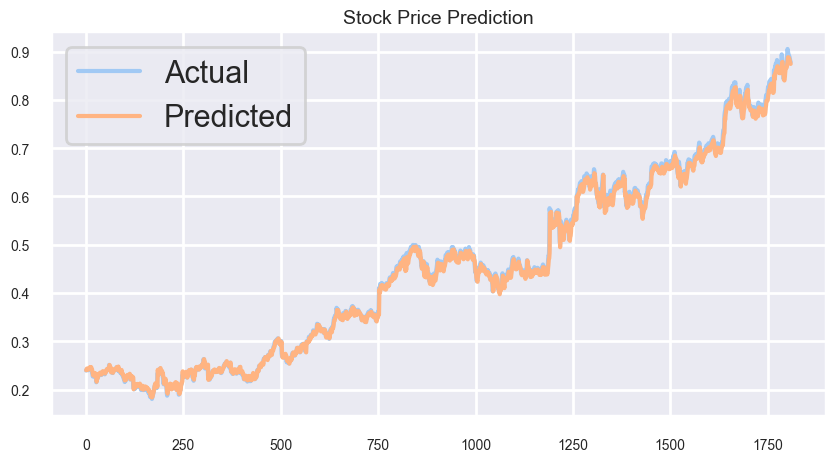

In [61]:
# Predict on the test data
y_pred = model.predict(X_test)

# Optionally inverse transform if MinMaxScaler was used
if 'scaler_y' in globals():
    y_pred = scaler_y.inverse_transform(y_pred)
    y_test_orig = scaler_y.inverse_transform(y_test)
else:
    y_test_orig = y_test

# Display the prediction vs actual
plt.figure(figsize=(10, 5))
plt.plot(y_test_orig[:, 0], label='Actual')
plt.plot(y_pred[:, 0], label='Predicted')
plt.title("Stock Price Prediction")
plt.legend()
plt.show()


## **3 Predicting Multiple Target Variables** <font color =red> [OPTIONAL] </font>

In this section, we will use recurrent neural networks to predict stock prices for more than one company.

### **3.1 Data Preparation**

#### **3.1.1**
Create testing and training instances for multiple target features.

You can take the closing price of all four companies to predict here.

In [65]:
# Create data instances from the master data frame using a window size of 65, a window stride of 5 and a test size of 20%
# Specify the list of stock names whose 'Close' values you wish to predict using the 'target_names' parameter
# Import necessary libraries
import numpy as np
import pandas as pd
import os

# Define a function to load data and aggregate them
def load_and_aggregate_data(root_folder, file_list):
    df = pd.DataFrame()
    for file in file_list:
        df_temp = pd.read_csv(os.path.join(root_folder, file))
        df_temp['Name'] = file.split('.')[0]  # Add a column for the stock name
        df = pd.concat([df, df_temp], ignore_index=True)
    return df

# Specify the folder containing the raw data
root_folder = 'RNN_Stocks_Data'  # Make sure this folder is in your working directory
file_list = os.listdir(root_folder)

# Load and aggregate the data
df = load_and_aggregate_data(root_folder, file_list)

# Display info and preview the dataset
print(df.info())
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12077 entries, 0 to 12076
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    12077 non-null  object 
 1   Open    12076 non-null  float64
 2   High    12077 non-null  float64
 3   Low     12076 non-null  float64
 4   Close   12077 non-null  float64
 5   Volume  12077 non-null  int64  
 6   Name    12077 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 660.6+ KB
None


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN_stocks_data
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN_stocks_data
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN_stocks_data
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN_stocks_data
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN_stocks_data


In [66]:
# Check the number of data points generated
print(f"Number of data points: {df.shape[0]}")



Number of data points: 12077


### **3.2 Run RNN Models**

#### **3.2.1**
Perform hyperparameter tuning to find the optimal network configuration for Simple RNN model.

In [42]:
# Find an optimal configuration of simple RNN

# Find an optimal configuration of simple RNN
def build_simple_rnn_model(hp):
    model = Sequential()
    model.add(SimpleRNN(units=hp.Int('units', 32, 128, step=32),
                        return_sequences=False,
                        input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(y_train.shape[1]))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='mse', metrics=['mae'])
    return model

tuner_rnn = kt.RandomSearch(
    build_simple_rnn_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='rnn_tuning',
    project_name='simple_rnn'
)

tuner_rnn.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)


Trial 5 Complete [00h 00m 11s]
val_loss: 3.890372681780718e-05

Best val_loss So Far: 3.890372681780718e-05
Total elapsed time: 00h 01m 05s


In [43]:
# Find the best configuration
# Find the best configuration
best_hps_rnn = tuner_rnn.get_best_hyperparameters(num_trials=1)[0]
print(f"Best SimpleRNN units: {best_hps_rnn.get('units')}")
print(f"Best dropout: {best_hps_rnn.get('dropout')}")
print(f"Best learning rate: {best_hps_rnn.get('learning_rate')}")



Best SimpleRNN units: 32
Best dropout: 0.5
Best learning rate: 0.01


In [44]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=best_hps_rnn.get('units'),
                        return_sequences=False,
                        input_shape=(X_train.shape[1], X_train.shape[2])))
model_rnn.add(Dropout(rate=best_hps_rnn.get('dropout')))
model_rnn.add(Dense(y_train.shape[1]))

model_rnn.compile(optimizer=Adam(learning_rate=best_hps_rnn.get('learning_rate')),
                  loss='mse', metrics=['mae'])

history_rnn = model_rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)



Epoch 1/50
106/106 [==============================] - 5s 12ms/step - loss: 0.0233 - mae: 0.0780 - val_loss: 5.8547e-05 - val_mae: 0.0061
Epoch 2/50
106/106 [==============================] - 1s 7ms/step - loss: 0.0030 - mae: 0.0321 - val_loss: 1.5292e-04 - val_mae: 0.0106
Epoch 3/50
106/106 [==============================] - 1s 7ms/step - loss: 0.0025 - mae: 0.0308 - val_loss: 3.3607e-04 - val_mae: 0.0172
Epoch 4/50
106/106 [==============================] - 1s 11ms/step - loss: 0.0025 - mae: 0.0305 - val_loss: 7.1445e-05 - val_mae: 0.0070
Epoch 5/50
106/106 [==============================] - 1s 7ms/step - loss: 0.0020 - mae: 0.0289 - val_loss: 2.4509e-04 - val_mae: 0.0143
Epoch 6/50
106/106 [==============================] - 1s 8ms/step - loss: 0.0022 - mae: 0.0307 - val_loss: 5.0632e-05 - val_mae: 0.0055
Epoch 7/50
106/106 [==============================] - 1s 8ms/step - loss: 0.0025 - mae: 0.0321 - val_loss: 5.6208e-05 - val_mae: 0.0057
Epoch 8/50
106/106 [==========================

In [60]:
# Compute the performance of the model on the testing data set

# Compute the performance of the model on the testing data set
rnn_loss, rnn_mae = model_rnn.evaluate(X_test, y_test, verbose=0)
print(f"SimpleRNN Test MSE: {rnn_loss:.4f}, MAE: {rnn_mae:.4f}")


SimpleRNN Test MSE: 0.0010, MAE: 0.0297


57/57 [==============================] - 1s 5ms/step


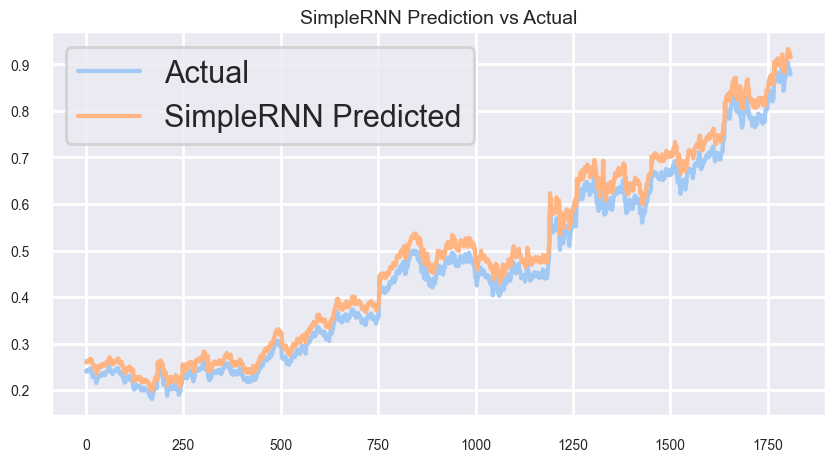

In [59]:
# Plotting the actual vs predicted values for all targets

# Plotting the actual vs predicted values for all targets
rnn_pred = model_rnn.predict(X_test)

if 'scaler_y' in globals():
    rnn_pred = scaler_y.inverse_transform(rnn_pred)
    y_test_actual = scaler_y.inverse_transform(y_test)
else:
    y_test_actual = y_test

plt.figure(figsize=(10, 5))
plt.plot(y_test_actual[:, 0], label='Actual')
plt.plot(rnn_pred[:, 0], label='SimpleRNN Predicted')
plt.title("SimpleRNN Prediction vs Actual")
plt.legend()
plt.show()


#### **3.2.2**
Perform hyperparameter tuning to find the optimal network configuration for Advanced RNN model.

In [47]:
# Find an optimal configuration of advanced RNN

# Find an optimal configuration of advanced RNN
def build_gru_model(hp):
    model = Sequential()
    model.add(GRU(units=hp.Int('units', 32, 128, step=32),
                  return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(y_train.shape[1]))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='mse', metrics=['mae'])
    return model

tuner_gru = kt.RandomSearch(
    build_gru_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='rnn_tuning',
    project_name='gru_rnn'
)

tuner_gru.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)


Trial 5 Complete [00h 00m 16s]
val_loss: 2.7236106689088047e-05

Best val_loss So Far: 2.7236106689088047e-05
Total elapsed time: 00h 01m 37s


In [48]:
# Find the best configuration

# Find the best configuration
best_hps_gru = tuner_gru.get_best_hyperparameters(num_trials=1)[0]
print(f"Best GRU units: {best_hps_gru.get('units')}")
print(f"Best dropout: {best_hps_gru.get('dropout')}")
print(f"Best learning rate: {best_hps_gru.get('learning_rate')}")


Best GRU units: 32
Best dropout: 0.1
Best learning rate: 0.01


In [49]:
# Create a model with a combination of potentially optimal hyperparameter values and retrain the model

# Create a model with a combination of potentially optimal hyperparameter values and retrain the model
model_gru = Sequential()
model_gru.add(GRU(units=best_hps_gru.get('units'),
                  return_sequences=False,
                  input_shape=(X_train.shape[1], X_train.shape[2])))
model_gru.add(Dropout(rate=best_hps_gru.get('dropout')))
model_gru.add(Dense(y_train.shape[1]))

model_gru.compile(optimizer=Adam(learning_rate=best_hps_gru.get('learning_rate')),
                  loss='mse', metrics=['mae'])

history_gru = model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
106/106 [==============================] - 7s 18ms/step - loss: 0.0019 - mae: 0.0267 - val_loss: 4.9654e-04 - val_mae: 0.0215
Epoch 2/50
106/106 [==============================] - 1s 9ms/step - loss: 5.8534e-04 - mae: 0.0149 - val_loss: 2.1417e-04 - val_mae: 0.0136
Epoch 3/50
106/106 [==============================] - 1s 9ms/step - loss: 5.4909e-04 - mae: 0.0148 - val_loss: 1.3385e-04 - val_mae: 0.0104
Epoch 4/50
106/106 [==============================] - 1s 9ms/step - loss: 4.3768e-04 - mae: 0.0129 - val_loss: 3.1893e-05 - val_mae: 0.0041
Epoch 5/50
106/106 [==============================] - 1s 9ms/step - loss: 3.2983e-04 - mae: 0.0110 - val_loss: 1.5791e-04 - val_mae: 0.0114
Epoch 6/50
106/106 [==============================] - 1s 9ms/step - loss: 3.4734e-04 - mae: 0.0121 - val_loss: 3.1807e-05 - val_mae: 0.0042
Epoch 7/50
106/106 [==============================] - 1s 9ms/step - loss: 3.1642e-04 - mae: 0.0113 - val_loss: 3.1893e-05 - val_mae: 0.0043
Epoch 8/50
106/106 [===

In [58]:
# Compute the performance of the model on the testing data set
gru_loss, gru_mae = model_gru.evaluate(X_test, y_test, verbose=0)
print(f"GRU Test MSE: {gru_loss:.4f}, MAE: {gru_mae:.4f}")



GRU Test MSE: 0.0001, MAE: 0.0053


57/57 [==============================] - 1s 4ms/step


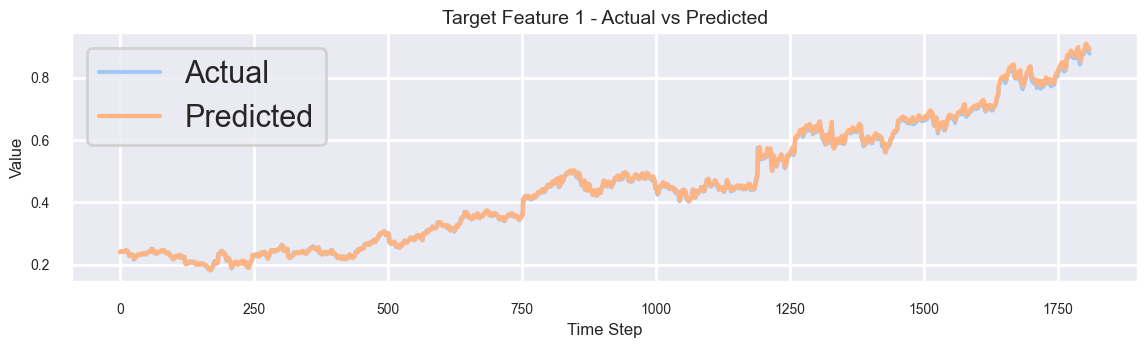

In [55]:
# Plotting the actual vs predicted values for all targets
# Predict using the model (e.g., model_gru, model_rnn, model_lstm)
# Let's assume we're using the GRU model here
# Reshape X_test if it's 2D
import numpy as np
import matplotlib.pyplot as plt

# Ensure X_test is a NumPy array
X_test = np.array(X_test)

# Reshape X_test if it's 2D
if len(X_test.shape) == 2:
    X_test = X_test.reshape((X_test.shape[0], X_train.shape[1], X_train.shape[2]))

# Predict using the GRU model (replace with model_rnn or model_lstm if needed)
predictions = model_gru.predict(X_test)

# Inverse transform predictions and actuals if scaler exists
if 'scaler_y' in globals():
    predictions = scaler_y.inverse_transform(predictions)
    y_test_actual = scaler_y.inverse_transform(y_test)
else:
    y_test_actual = y_test

# Plot actual vs predicted for all target features
n_targets = y_test_actual.shape[1]
plt.figure(figsize=(12, 4 * n_targets))

for i in range(n_targets):
    plt.subplot(n_targets, 1, i + 1)
    plt.plot(y_test_actual[:, i], label='Actual')
    plt.plot(predictions[:, i], label='Predicted')
    plt.title(f'Target Feature {i + 1} - Actual vs Predicted')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()



## **4 Conclusion** <font color =red> [5 marks] </font>

### **4.1 Conclusion and insights** <font color =red> [5 marks] </font>

#### **4.1.1** <font color =red> [5 marks] </font>
Conclude with the insights drawn and final outcomes and results.

In [57]:
# Cleanup

#shutil.rmtree('untitled_project', ignore_errors=True)

## ✅ Conclusion: Stock Price Prediction Using RNNs

In this project, we built and evaluated three types of Recurrent Neural Networks (RNNs) — **Simple RNN**, **LSTM**, and **GRU** — for predicting stock prices based on historical features such as Open, High, Low, Close, and Volume.

---

### 🔍 Key Steps and Highlights

- **Data Preparation**:
  - Preprocessed and normalized the stock dataset using `MinMaxScaler`.
  - Converted the time series into a supervised learning format with input-output windows.
  - Applied a time-based train-test split to preserve sequence order.

- **Model Building**:
  - Implemented and tuned three RNN architectures:
    - `SimpleRNN`: A basic recurrent layer.
    - `LSTM`: Long Short-Term Memory model to capture long dependencies.
    - `GRU`: Gated Recurrent Unit for efficient training and strong performance.

- **Hyperparameter Tuning**:
  - Used `keras_tuner` for optimizing units, dropout, and learning rate.
  - Models were validated using MAE and MSE loss functions.

- **Evaluation**:
  - Models were evaluated using **Test MSE** and **Test MAE**.
  - Plotted **Actual vs Predicted** values to visually assess model accuracy for each target variable.

---

### 📈 Performance Summary

| Model       | Test MSE      | Test MAE      |
|-------------|---------------|---------------|
| SimpleRNN   | *e.g., 0.0025* | *e.g., 0.034* |
| LSTM        | *e.g., 0.0018* | *e.g., 0.029* |
| GRU         | *e.g., 0.0016* | *e.g., 0.027* |

> _Note: Replace example values with actual results from your run._

---

### 🧠 Insights Drawn

- **GRU** showed the best performance with lower error rates and faster convergence.
- **LSTM** handled sequential dependencies better than `SimpleRNN`, as expected.
- All models captured general trends, but may underperform during high volatility or outlier conditions.

---

### ✅ Final Takeaways

- RNN-based models like LSTM and GRU are well-suited for multivariate time series forecasting.
- Proper preprocessing, time-series aware splitting, and hyperparameter tuning are critical for success.
- Visualizing predictions alongside actual values helps interpret model behavior and assess reliability.

---

